In [2]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys
import numpy as np
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.regularizers import l2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data = pd.read_csv(r'/content/drive/MyDrive/HW 2/file_data_Fullfinal.csv')
print(data)
labels = data.label.str.extract(' (\w*\.?) ([\w*\.?])')
print(labels)

              label
0        0 000000 0
1        1 000001 0
2        2 000002 0
3        3 000003 0
4        4 000004 0
...             ...
4344  4344 004344 3
4345  4345 004345 3
4346  4346 004346 3
4347  4347 004347 3
4348  4348 004348 3

[4349 rows x 1 columns]
           0  1
0     000000  0
1     000001  0
2     000002  0
3     000003  0
4     000004  0
...      ... ..
4344  004344  3
4345  004345  3
4346  004346  3
4347  004347  3
4348  004348  3

[4349 rows x 2 columns]


In [ ]:
train_dir =r'/content/drive/MyDrive/HW 2/data_set/imgs'
DR = r"/content/drive/MyDrive/HW 2/new_data_set/DR"
if not os.path.exists(DR):
    os.mkdir(DR)
for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = train_dir + '/'+ filename + '.bmp'
    dst_path = DR + str(class_name) + '/' + filename + '.bmp'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


In [ ]:
import splitfolders
input_folder = '/content/drive/MyDrive/HW 2/new_data_set'
output_folder="/content/drive/MyDrive/HW 2/Splitted_data"
splitfolders.ratio(input_folder, output_folder,
                   seed=42, ratio=(.85, 0, .15),
                   group_prefix=None)

Copying files: 4349 files [01:11, 60.45 files/s]


Found 3044 images belonging to 4 classes.
Found 650 images belonging to 4 classes.
Label : bubble defects


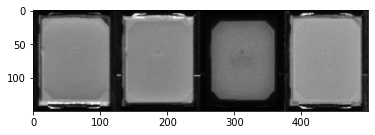

In [54]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
from matplotlib import pyplot as plt

img_width=500; img_height=150
batch_size=16
TRAINING_DIR = '/content/drive/MyDrive/HW 2/Splitted_data/train'


train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1764
    )

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode = 'rgb',
                                                    shuffle = True,
                                                    target_size=(img_height, img_width),
                                                    subset='training'
                                                    )

validation_datagen = ImageDataGenerator(rescale = 1/255.0,
                                        validation_split=0.1764
                                        )
train_dataset = ImageFolder(TRAINING_DIR,transform = transforms.Compose([
transforms.Resize((img_height,img_width)),transforms.ToTensor()
 ]))

validation_generator = validation_datagen.flow_from_directory(TRAINING_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              #color_mode = 'rgb',
                                                              #shuffle = True,
                                                              target_size=(img_height, img_width),
                                                              subset='validation'
                                                             )

def display_img(img,label):
  print(f"Label : {train_dataset.classes[label]}")
  plt.imshow(img.permute(1,2,0))
#display the first image in the dataset
display_img(*train_dataset[0])



In [55]:
from collections import Counter

counter = Counter(train_generator.classes)                          
max_val = float(max(counter.values()))       
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
#class_weight = dict(enumerate(class_weights))
print(class_weights)

{0: 8.75, 1: 14.205882352941176, 2: 1.0, 3: 13.19672131147541}


In [56]:
from keras.layers import Flatten, Dense, Lambda, ELU, Cropping2D, Dropout
from keras.layers.convolutional import Convolution2D, Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.models import Model
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
IMAGE_SIZE = [img_height, img_width]

from keras.applications.vgg19 import VGG19
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

print(vgg.summary())





Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 500, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 500, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 500, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 250, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 250, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 250, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 125, 128)      0     

In [57]:
for layer in vgg.layers:
    layer.trainable = False

In [58]:
x = Flatten()(vgg.output)

prediction = Dense(4, activation='softmax')(x)

In [135]:

model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 500, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 500, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 500, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 250, 64)       0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 250, 128)      73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 250, 128)      147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 125, 128)      0   

In [60]:
model.compile(loss='categorical_crossentropy', optimizer='Ftrl', weighted_metrics=['accuracy'],metrics=['accuracy'])

In [61]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001) 
callbacks = [earlystop, learning_rate_reduction]

In [66]:
epochs=10
batch_size=50

history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=650/batch_size,
    steps_per_epoch=3044/batch_size,
    #callbacks=callbacks,
    class_weight=class_weights
)

Epoch 1/10
60/60 [==============================] - 1138s 19s/step - loss: 3.3101 - accuracy: 0.3555 - weighted_accuracy: 0.5183 - val_loss: 1.1565 - val_accuracy: 0.1202 - val_weighted_accuracy: 0.1202
Epoch 2/10
60/60 [==============================] - 1220s 20s/step - loss: 2.9156 - accuracy: 0.3822 - weighted_accuracy: 0.5108 - val_loss: 0.8212 - val_accuracy: 0.7740 - val_weighted_accuracy: 0.7740
Epoch 3/10
60/60 [==============================] - 1157s 19s/step - loss: 3.0366 - accuracy: 0.4037 - weighted_accuracy: 0.5487 - val_loss: 0.9185 - val_accuracy: 0.8077 - val_weighted_accuracy: 0.8077
Epoch 4/10
60/60 [==============================] - 1159s 19s/step - loss: 2.8685 - accuracy: 0.4170 - weighted_accuracy: 0.5846 - val_loss: 0.8989 - val_accuracy: 0.8029 - val_weighted_accuracy: 0.8029
Epoch 5/10
60/60 [==============================] - 1150s 19s/step - loss: 3.0882 - accuracy: 0.3678 - weighted_accuracy: 0.5557 - val_loss: 0.8999 - val_accuracy: 0.6442 - val_weighted_ac

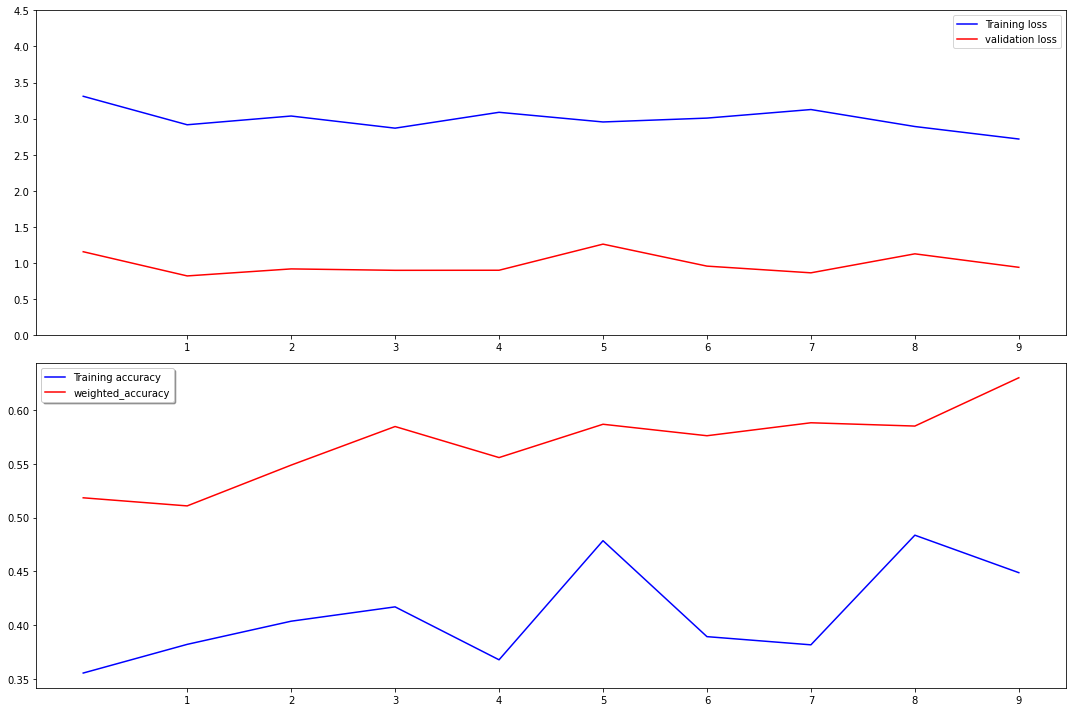

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 5, 0.5))
ax1.legend()

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['weighted_accuracy'], color='r',label="weighted_accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.legend()

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [69]:
model.save('/content/drive/MyDrive/HW 2/led_model.hdf5')


In [110]:
img_width=500; img_height=150
batch_size=16
TRAINING_DIR = '/content/drive/MyDrive/HW 2/Splitted_data/test'

test_datagen = ImageDataGenerator(rescale = 1/255.0)

test_generator = test_datagen.flow_from_directory(TRAINING_DIR,
                                                              batch_size=batch_size,
                                                              class_mode= None,
                                                              #color_mode = 'rgb',
                                                              shuffle = False,
                                                              target_size=(img_height, img_width),
                                                             )

Found 655 images belonging to 4 classes.


In [100]:

sample_weight = np.ones(shape=(len(test_generator),))
sample_weight[test_generator == 4] = 3
print(sample_weight)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [42]:
"""
from keras import models    
model = models.load_model('/content/drive/MyDrive/HW 2/led_model.hdf5', compile = False)
"""

"\nfrom keras import models    \nmodel = models.load_model('led_model.hdf5', compile = False)\n"

In [116]:
from keras import models
#test_score = model.evaluate_generator(test_generator, batch_size)

test_score = model.evaluate(test_generator, batch_size=10, verbose=1, 
                             sample_weight=None)

print("[INFO] weighted_accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

41/41 [==============================] - 3s 80ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - weighted_accuracy: 0.0000e+00
[INFO] weighted_accuracy: 0.00%
[INFO] accuracy: 0.00%
[INFO] Loss:  0.0


Text(0.5, 1.0, 'Loss Curves')

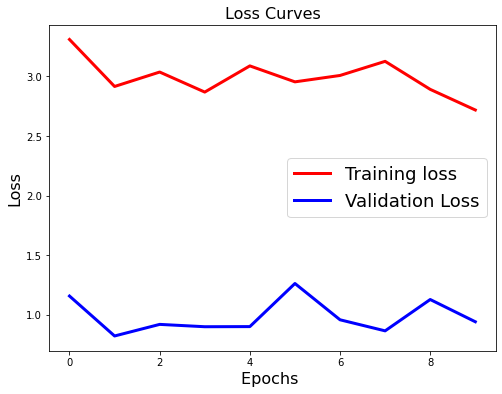

In [106]:
plt.figure(figsize=[8,6])

plt.plot(history.history['loss'],'r',linewidth=3.0)

plt.plot(history.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

In [117]:
predict = model.predict_generator(test_generator, steps=np.ceil(485/batch_size))
  

print("Number of predicted images:", len(predict), "\n")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


Number of predicted images: 496 



In [118]:
print("    0:bubble_defects          1:glue_defects       2:normal       3:object_defects \n\n", predict, "\n")

    0:bubble_defects          1:glue_defects       2:normal       3:object_defects 

 [[0.3498231  0.00637264 0.36710915 0.27669504]
 [0.20129925 0.01000431 0.3638958  0.42480063]
 [0.41731495 0.00727505 0.19067843 0.38473153]
 ...
 [0.21139069 0.01672869 0.3157769  0.45610368]
 [0.2061425  0.00972867 0.3575478  0.42658105]
 [0.12595624 0.03365472 0.31902155 0.52136755]] 



In [107]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [108]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)



print(target_names)

['bubble defects', 'glue defects', 'normal', 'object defects']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Normalized confusion matrix


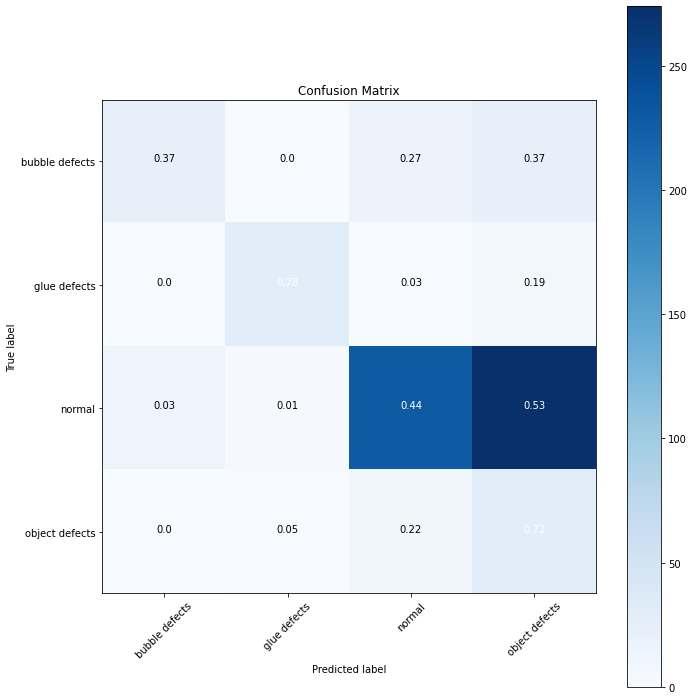

In [119]:
import itertools 
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = model.predict_generator(test_generator)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)

plot_confusion_matrix(cm, target_names, title='Confusion Matrix')